## **Comparision** of Individual Decision tree, Boosting and Bagging on the dataset:

we will perfrom classification task on a small dataset first (`iris dataset`) and then on a large dataset (`diamonds dataset`) to compare the performance of individual decision tree, boosting and bagging algorithms.

In [1]:
# install the xgboost library if not install already!
# !pip install xgboost -q

In [5]:
# importing all the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [6]:
# loading the dataset:

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



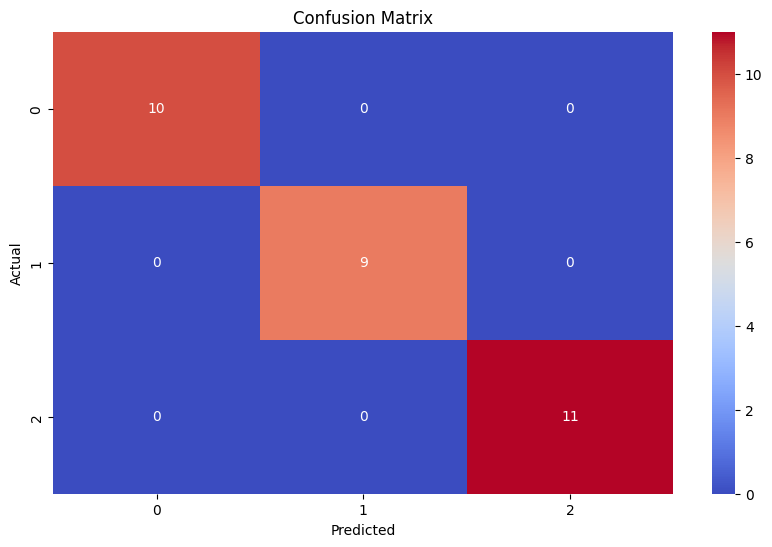

In [7]:
# specifying the X features and Y target:

X = df.drop('species', axis=1)
Y = df['species']

# train test split:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# call, fit and predict the model:
df_model = DecisionTreeClassifier()
df_model.fit(X_train, Y_train)
Y_pred = df_model.predict(X_test)

# evaluate the model:

print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred, average='weighted'))
print('Recall:', recall_score(Y_test, Y_pred, average='weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred, average='weighted'))
print('\nConfusion Matrix:\n', confusion_matrix(Y_test, Y_pred))
print('\nClassification Report:\n', classification_report(Y_test, Y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Let's try with **Random Forest**:

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



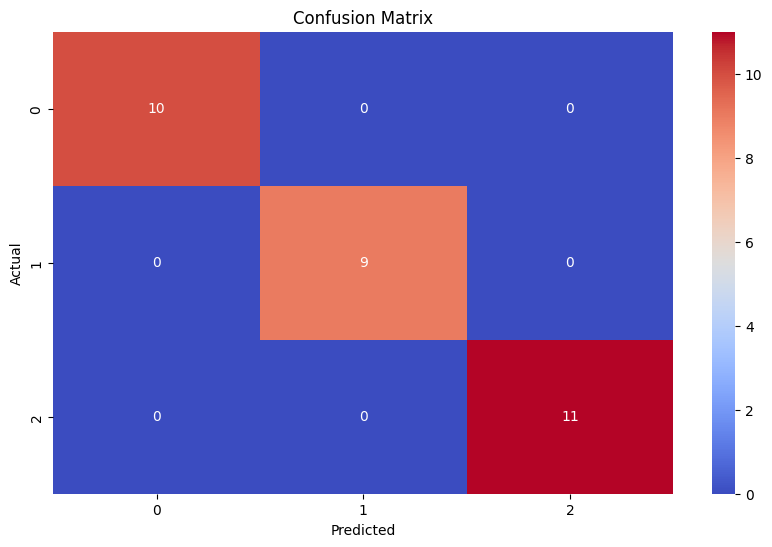

In [8]:
# Random Forest Classifier:

# call, fit and predict the model:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
Y_pred = rf_model.predict(X_test)

# evaluate the model:
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred, average='weighted'))
print('Recall:', recall_score(Y_test, Y_pred, average='weighted'))
print('F1 Score:', f1_score(Y_test, Y_pred, average='weighted'))
print('\nConfusion Matrix:\n', confusion_matrix(Y_test, Y_pred))
print('\nClassification Report:\n', classification_report(Y_test, Y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Lets try the **XGBoost Classifier**:

### Note!!!!

If you are using the XGBoost model, you have to encode the `target variable using LabelEncoder`:

In [15]:
# XGBoost Classifier:

# load the dataset:

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# encode the target variable:

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



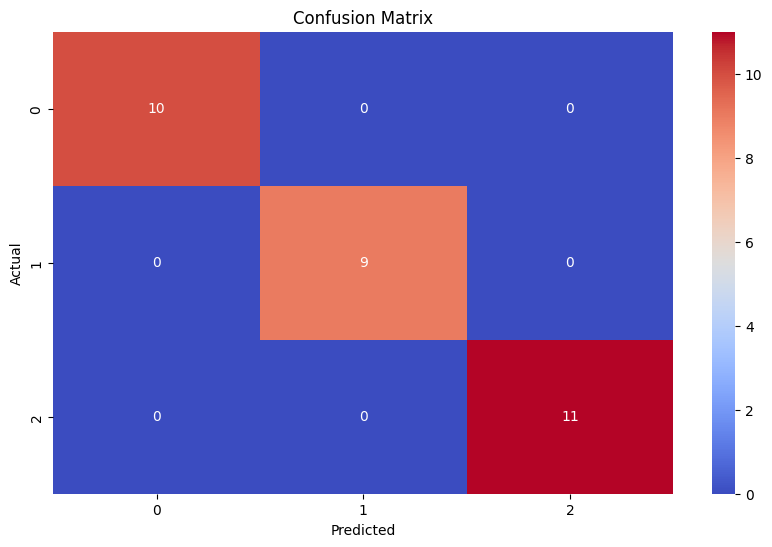

In [24]:
# Now we have our target variable encoded, let's specify the X features and Y target:

X = df.drop('species', axis=1)
y = df['species']

# train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# call, fit and predict the model:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# evaluate the model:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

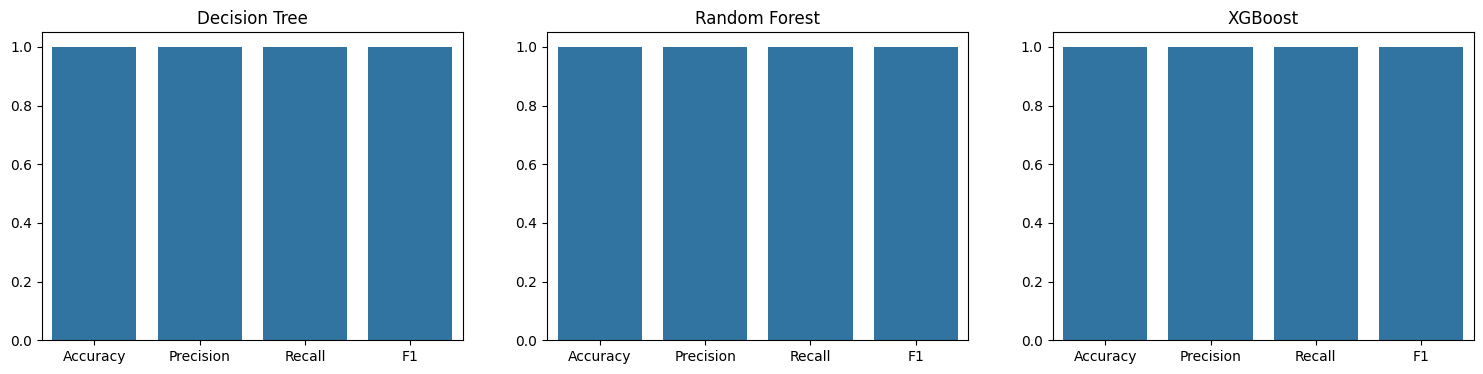

In [27]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(25, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()

### As we used a small dataset, the models are performing well with the dataset.

## Let's try with a large dataset: **(Diamonds dataset)**

In [28]:
# load the dataset:

df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## About the dataset:


--> The dataset has `53940 rows` and `10 columns.`





--> The diamonds dataset contains the following columns:

1. carat: weight of the diamond (0.2--5.01)

2. cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3. color: diamond colour, from J (worst) to D (best)

4. clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5. depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6. table: width of top of diamond relative to widest point (43--95)

7. price: price in US dollars (\$326--\$18,823)

8. x: length in mm (0--10.74)

9. y: width in mm (0--58.9)

10. z: depth in mm (0--31.8)



In [32]:
# encode the target variable:

le = LabelEncoder()
df['cut'] = le.fit_transform(df['cut'])

# encode the categorical variables included in the features:
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Accuracy: 0.71440489432703
Precision: 0.7152127602563675
Recall: 0.71440489432703
F1 Score: 0.7147863565652881

Confusion Matrix:
 [[ 283   37    3    5    7]
 [  31  694   24   28  227]
 [   4   21 3416  339  512]
 [   9   49  330 2018  369]
 [   9  228  495  354 1296]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       335
           1       0.67      0.69      0.68      1004
           2       0.80      0.80      0.80      4292
           3       0.74      0.73      0.73      2775
           4       0.54      0.54      0.54      2382

    accuracy                           0.71     10788
   macro avg       0.72      0.72      0.72     10788
weighted avg       0.72      0.71      0.71     10788



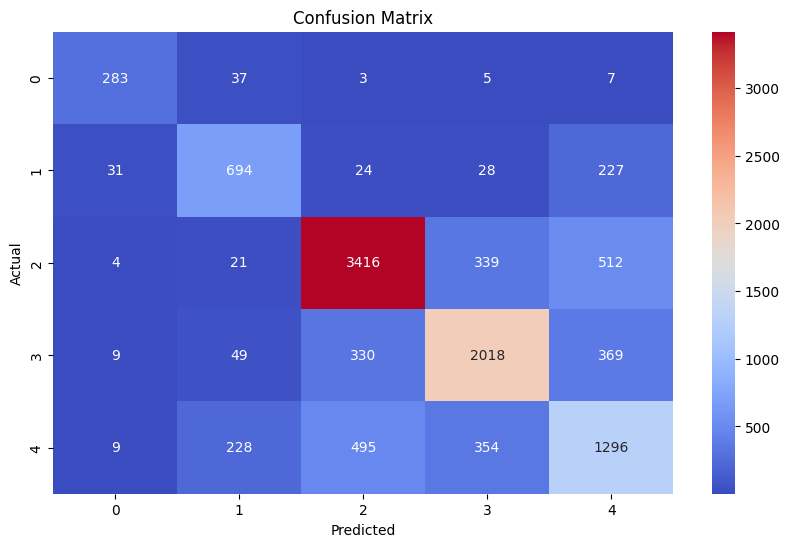

In [33]:
# specify the X features and Y target:

X = df.drop('cut', axis=1)
y = df['cut']

# train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# call, fit and predict the model:
df_model = DecisionTreeClassifier()
df_model.fit(X_train, y_train)
y_pred = df_model.predict(X_test)

# evaluate the model:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.7863366703744902
Precision: 0.7799672062305715
Recall: 0.7863366703744902
F1 Score: 0.7798585325891223

Confusion Matrix:
 [[ 306   16    3    7    3]
 [  24  711   20   39  210]
 [   2   15 3932  165  178]
 [   1   15  309 2257  193]
 [   4  147  495  459 1277]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       335
           1       0.79      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.77      0.81      0.79      2775
           4       0.69      0.54      0.60      2382

    accuracy                           0.79     10788
   macro avg       0.80      0.78      0.78     10788
weighted avg       0.78      0.79      0.78     10788



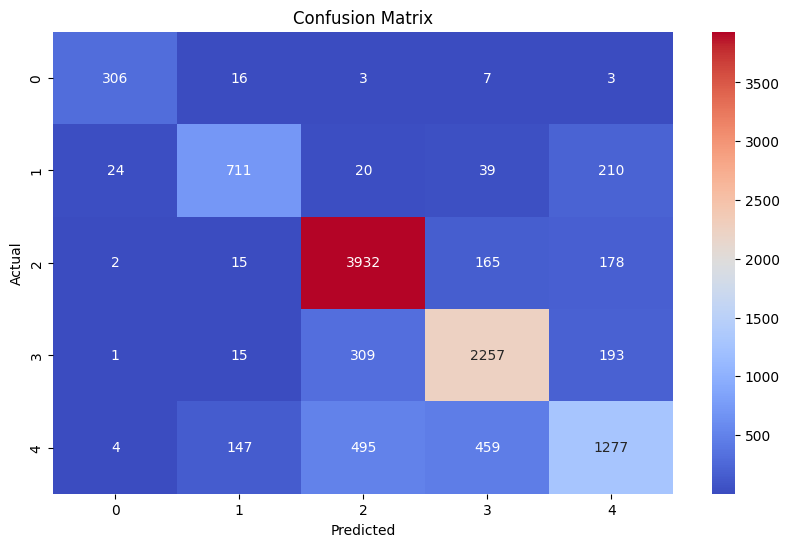

In [34]:
# Random Forest Classifier:

# call, fit and predict the model:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# evaluate the model:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8056173526140156
Precision: 0.8016880797182208
Recall: 0.8056173526140156
F1 Score: 0.8016145716869405

Confusion Matrix:
 [[ 303   19    3    6    4]
 [  23  714   14   20  233]
 [   1   11 3948  164  168]
 [   1    7  300 2274  193]
 [   3  137  501  289 1452]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       335
           1       0.80      0.71      0.75      1004
           2       0.83      0.92      0.87      4292
           3       0.83      0.82      0.82      2775
           4       0.71      0.61      0.66      2382

    accuracy                           0.81     10788
   macro avg       0.82      0.79      0.80     10788
weighted avg       0.80      0.81      0.80     10788



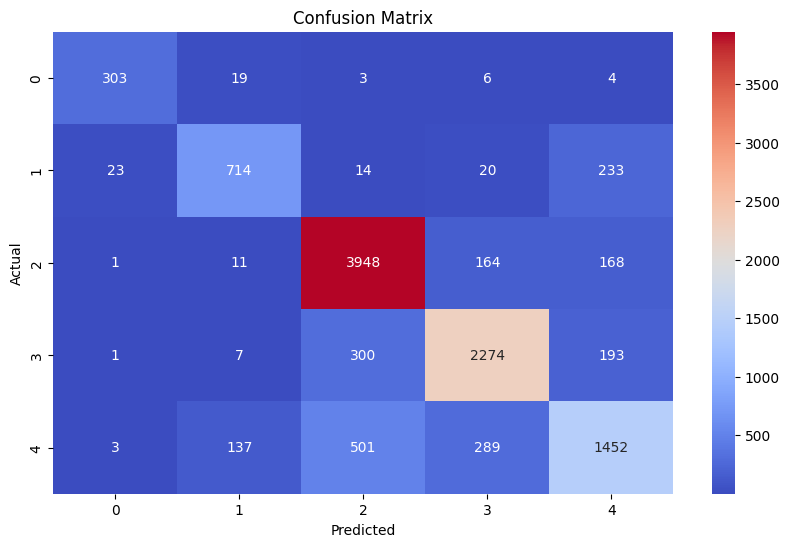

In [35]:
# XGBoost Classifier:

# call, fit and predict the model:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# evaluate the model:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# plot the confusion matrix:

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

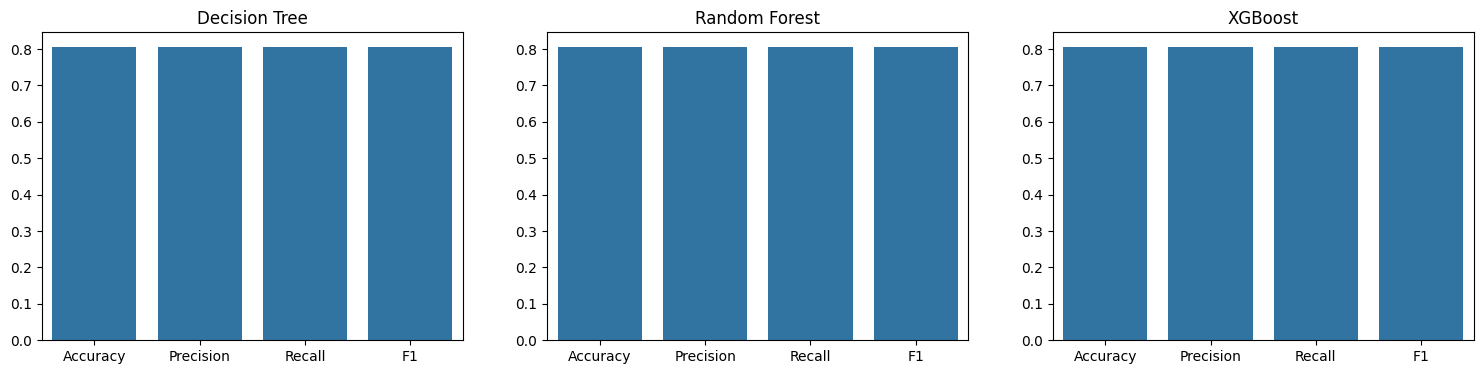

In [37]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(25, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()

### we can see that the highest accuracy, precision, recall and f1 score is achieved by the `XGBoost model`

---
In this notebook we compared the performance of individual decision tree, boosting and bagging algorithms on a small dataset and a large dataset. We can see that the `XGBoost model` performed well on both the datasets.


---

# About Me:

<img src="https://scontent.flhe6-1.fna.fbcdn.net/v/t39.30808-6/449152277_18043153459857839_8752993961510467418_n.jpg?_nc_cat=108&ccb=1-7&_nc_sid=127cfc&_nc_ohc=6slHzGIxf0EQ7kNvgEeodY9&_nc_ht=scontent.flhe6-1.fna&oh=00_AYCiVUtssn2d_rREDU_FoRbXvszHQImqOjfNEiVq94lfBA&oe=66861B78" width="30%">

**Muhammd Faizan**

3rd Year BS Computer Science student at University of Agriculture, Faisalabad.\
Contact me for queries/collabs/correction

[Kaggle](https://www.kaggle.com/faizanyousafonly/)\
[Linkedin](https://www.linkedin.com/in/mrfaizanyousaf/)\
[GitHub](https://github.com/faizan-yousaf/)\
[Email] faizan6t45@gmail.com or faizanyousaf815@gmail.com \
[Phone/WhatsApp]() +923065375389